**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

In [1]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

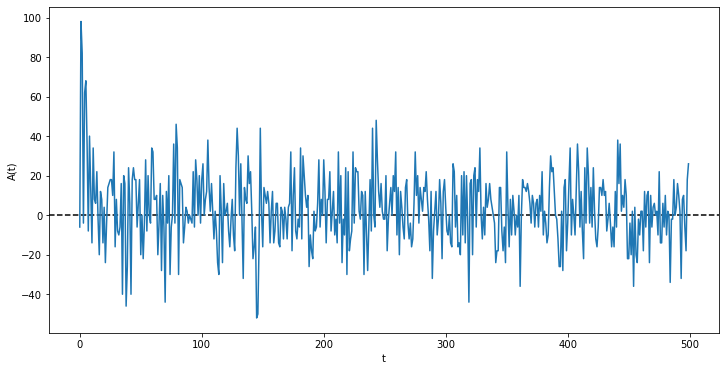

In [2]:
# Use anything from lib package
# E.g.
from lib.functions import simulate_simple_game

simulate_simple_game()

0.54
0.44665
0.20875


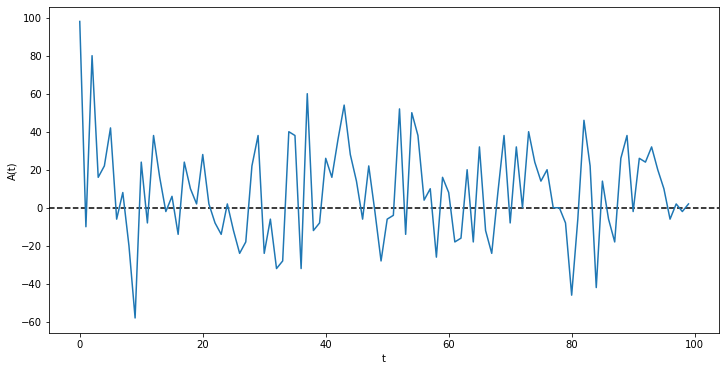

In [3]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

game = MinorityGame(
    n_agents=201,
    factory_dict={
        0.3: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.5: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy, AlwaysOneStrategy],
                strategy_update_rate=0.8,
                strategy_update_fraction=0.3
            ),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.2: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m=2)
        ),
    }
)

times, attendances, _, _ = game.simulate_game(max_steps=100)
# Print the success rate of a specific agent
print(game.agents[0].success_rate())

# Print the success rate of all agents
print(game.total_success_rate())

# Print the success rate of strategy updating agents
print(game.total_success_rate(agent_cls=StrategyUpdatingAgent))

default_plot(times, attendances)